In [1]:
from inverted_index import InvertedIndex
from pympler.asizeof import asizeof

def convert_size(size_bytes):
    import math
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmsy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Gamma encoding

## Without differences encoding

In [2]:
from inverted_index import InvertedIndex


inverted_index_gamma_no_diff = InvertedIndex([
    "../data/msu.csv", "../data/spbu.csv",
    "../data/postupashki.csv", "../data/vseros.csv"],
    encoding="gamma",
    encode_differences=False)

Processing passed csv_paths


In [3]:
inverted_index_gamma_no_diff.create_inverted_index()

  0%|          | 0/40000 [00:00<?, ?it/s]

In [4]:
convert_size(asizeof(inverted_index_gamma_no_diff.index)) 

'31.31 MB'

In [5]:
len(inverted_index_gamma_no_diff.search("Ректор СПбГУ"))  # n of docs with "Ректор" & "СПбГУ" in it

155

In [6]:
len(inverted_index_gamma_no_diff.search("Ректор МГУ"))  # n of docs with "Ректор" & "МГУ" in it

1076

In [7]:
len(inverted_index_gamma_no_diff.index)

91683

In [8]:
assert inverted_index_gamma_no_diff.search("ректор") == inverted_index_gamma_no_diff.search("Ректор")

In [9]:
%%timeit -r 10 -n 10

inverted_index_gamma_no_diff.search("Ректор СПбГУ") 

710 ms ± 7.78 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [10]:
%%timeit -r 10 -n 10

inverted_index_gamma_no_diff.search("Ректор МГУ")

622 ms ± 2.17 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


## With differences encoding

In [11]:
from inverted_index import InvertedIndex



inverted_index_gamma_with_diff = InvertedIndex(
    ["../data/msu.csv", "../data/spbu.csv",
    "../data/postupashki.csv", "../data/vseros.csv"],
    encoding="gamma",
    encode_differences=True)

Processing passed csv_paths


In [12]:
inverted_index_gamma_with_diff.create_inverted_index()

  0%|          | 0/40000 [00:00<?, ?it/s]

In [13]:
convert_size(asizeof(inverted_index_gamma_with_diff.index)) 

'22.14 MB'

In [14]:
len(inverted_index_gamma_with_diff.search("Ректор СПбГУ"))  # n of docs with "Ректор" & "СПбГУ" in it

155

In [15]:
%%timeit -r 10 -n 10

inverted_index_gamma_with_diff.search("Ректор СПбГУ") 

16.3 ms ± 206 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [16]:
%%timeit -r 10 -n 10

inverted_index_gamma_with_diff.search("Ректор МГУ")

18.8 ms ± 585 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


# Delta encoding

## Without differences encoding

In [18]:
from inverted_index import InvertedIndex


inverted_index_delta_no_diff = InvertedIndex(
    ["../data/msu.csv", "../data/spbu.csv",
    "../data/postupashki.csv", "../data/vseros.csv"],
    encoding="delta",
    encode_differences=False)

Processing passed csv_paths


In [19]:
inverted_index_delta_no_diff.create_inverted_index()

  0%|          | 0/40000 [00:00<?, ?it/s]

In [20]:
convert_size(asizeof(inverted_index_delta_no_diff.index))

'27.39 MB'

In [21]:
len(inverted_index_delta_no_diff.search("Ректор СПбГУ"))  # n of docs with "Ректор" & "СПбГУ" in it

155

In [22]:
rektor = inverted_index_delta_no_diff.search("Ректор")
spbu = inverted_index_delta_no_diff.search("спбгу")
len(rektor & spbu)

155

In [23]:
len(inverted_index_delta_no_diff.search("дом"))  # n of docs with "Ректор" & "СПбГУ" in it

488

In [24]:
%%timeit -r 10 -n 10

inverted_index_delta_no_diff.search("Ректор СПбГУ") 

421 ms ± 1.39 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [25]:
%%timeit -r 10 -n 10

inverted_index_delta_no_diff.search("Ректор МГУ")

409 ms ± 1.85 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


## With differences encoding

In [26]:
from inverted_index import InvertedIndex


inverted_index_delta_with_diff = InvertedIndex(
    ["../data/msu.csv", "../data/spbu.csv",
    "../data/postupashki.csv", "../data/vseros.csv"],
    encoding="delta",
    encode_differences=True)

Processing passed csv_paths


In [27]:
inverted_index_delta_with_diff.create_inverted_index()

  0%|          | 0/40000 [00:00<?, ?it/s]

In [28]:
convert_size(asizeof(inverted_index_delta_with_diff.index)) 

'21.5 MB'

In [29]:
len(inverted_index_delta_with_diff.search("Ректор СПбГУ"))  # n of docs with "Ректор" & "СПбГУ" in it

155

In [30]:
%%timeit -r 10 -n 10

inverted_index_delta_with_diff.search("Ректор СПбГУ") 

25.8 ms ± 329 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [31]:
%%timeit -r 10 -n 10

inverted_index_delta_with_diff.search("Ректор МГУ")

28.8 ms ± 587 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


# No encoding

## Without differences encoding

In [32]:
from inverted_index import InvertedIndex


inverted_index_none_no_diff = InvertedIndex(
    ["../data/msu.csv", "../data/spbu.csv",
    "../data/postupashki.csv", "../data/vseros.csv"],
    encoding=None,
    encode_differences=False)

Processing passed csv_paths


In [33]:
inverted_index_none_no_diff.create_inverted_index()

  0%|          | 0/40000 [00:00<?, ?it/s]

In [45]:
convert_size(asizeof(inverted_index_none_no_diff.index)) 

'32.14 MB'

In [35]:
len(inverted_index_none_no_diff.search("Ректор СПбГУ"))  # n of docs with "Ректор" & "СПбГУ" in it

155

In [36]:
%%timeit -r 10 -n 10

inverted_index_none_no_diff.search("Ректор СПбГУ") 

1.47 ms ± 85.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [37]:
%%timeit -r 10 -n 10

inverted_index_none_no_diff.search("Ректор МГУ")

1.7 ms ± 204 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


## With differences encoding

In [38]:
from inverted_index import InvertedIndex


inverted_index_none_with_diff = InvertedIndex(
    ["../data/msu.csv", "../data/spbu.csv",
    "../data/postupashki.csv", "../data/vseros.csv"],
    encoding=None,
    encode_differences=True)

Processing passed csv_paths


In [39]:
inverted_index_none_with_diff.create_inverted_index()

  0%|          | 0/40000 [00:00<?, ?it/s]

In [40]:
convert_size(asizeof(inverted_index_none_with_diff.index)) 

'40.98 MB'

In [41]:
len(inverted_index_none_with_diff.search("Ректор СПбГУ"))  # n of docs with "Ректор" & "СПбГУ" in it

155

In [42]:
len(inverted_index_none_with_diff.index)

91683

In [43]:
%%timeit -r 10 -n 100

inverted_index_none_with_diff.search("Ректор СПбГУ") 

1.55 ms ± 25.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [44]:
%%timeit -r 10 -n 100

inverted_index_none_with_diff.search("Ректор МГУ")

1.75 ms ± 99.9 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


# Plots

In [1]:
import matplotlib.pyplot as plt

## Memory plot

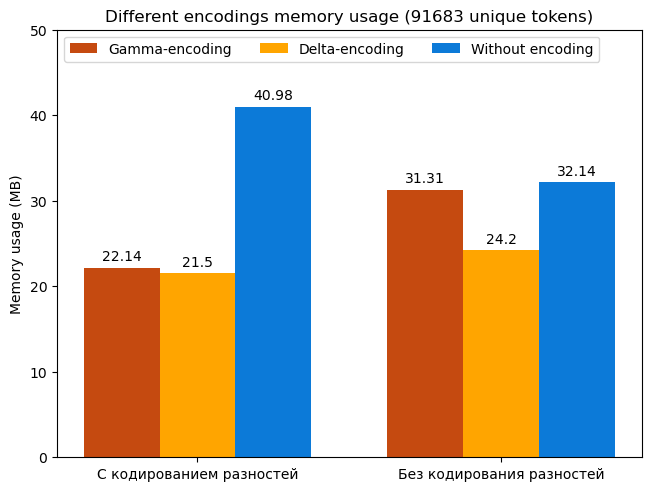

In [53]:
import matplotlib.pyplot as plt
import numpy as np

encoding_type = ("С кодированием разностей", "Без кодирования разностей")
encoding_memory_usage = {
    'Gamma-encoding': (22.14, 31.31),
    'Delta-encoding': (21.5, 27.39),
    'Without encoding': (40.98, 32.14),
}

x = np.arange(len(encoding_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

c = ['#c54a10', 'orange', '#0c7ad8']
for i, (attribute, measurement) in enumerate(encoding_memory_usage.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory usage (MB)')
ax.set_title('Different encodings memory usage (91683 unique tokens)')
ax.set_xticks(x + width, encoding_type)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 50)

# plt.show()
fig.savefig("../data/memory_usage.png", dpi=300)

## Query plot

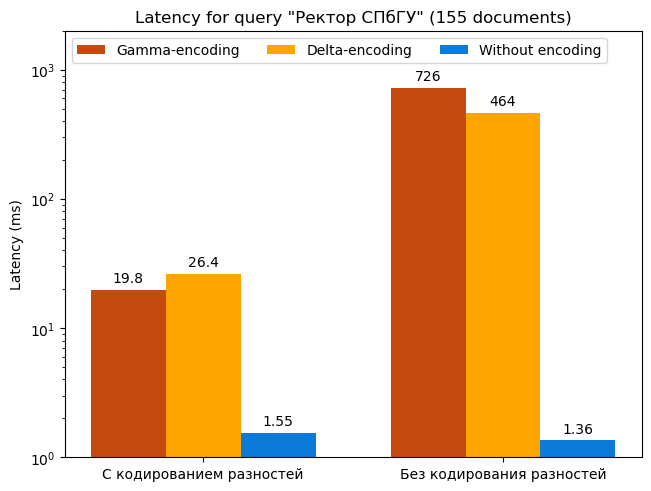

In [54]:
import matplotlib.pyplot as plt
import numpy as np

encoding_type = ("С кодированием разностей", "Без кодирования разностей")
encoding_latency = {
    'Gamma-encoding': (19.8, 726),
    'Delta-encoding': (26.4, 464),
    'Without encoding': (1.55, 1.36),
}


x = np.arange(len(encoding_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

c = ['#c54a10', 'orange', '#0c7ad8']
for i, (attribute, measurement) in enumerate(encoding_latency.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)')
ax.set_title('Latency for query "Ректор СПбГУ" (155 documents)')
ax.set_xticks(x + width, encoding_type)
ax.legend(loc='upper left', ncols=3)
ax.set_yscale('log')
ax.set_ylim(1, 2000)

# plt.show()
fig.savefig("../data/latency_spbu.png", dpi=300)

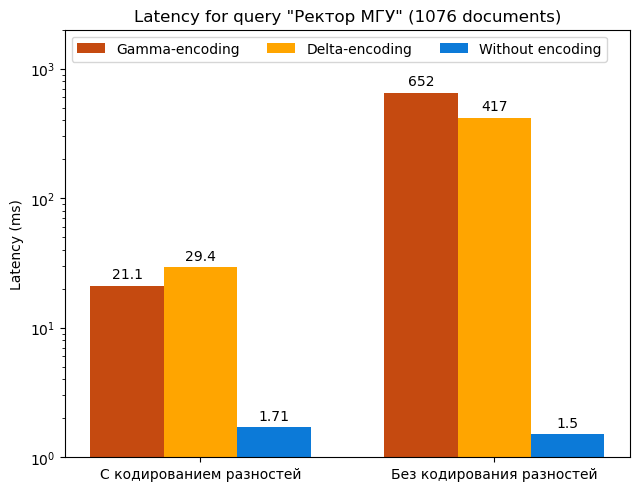

In [55]:
import matplotlib.pyplot as plt
import numpy as np

encoding_type = ("С кодированием разностей", "Без кодирования разностей")
encoding_latency = {
    'Gamma-encoding': (21.1, 652),
    'Delta-encoding': (29.4, 417),
    'Without encoding': (1.71, 1.5),
}


x = np.arange(len(encoding_type))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

c = ['#c54a10', 'orange', '#0c7ad8']
for i, (attribute, measurement) in enumerate(encoding_latency.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)')
ax.set_title('Latency for query "Ректор МГУ" (1076 documents)')
ax.set_xticks(x + width, encoding_type)
ax.legend(loc='upper left', ncols=3)
ax.set_yscale('log')
ax.set_ylim(1, 2000)
# ax.grid()

plt.show()
fig.savefig("../data/latency_msu.png", dpi=300)